### Appendix A (Preprocessing)

In [ ]:
# Carry out pre-processing of the handwriting images

!pip install opencv-python --quiet
!pip install matplotlib --quiet

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def pre_process_words(image_path, display=False, verbose=False):
    '''
    Function to break down the image to individual words

    Input: image_path - path to the image
            display - flag to display

    Output: None
    '''
    # Load the image
    base_file_path = "./hw_images/"
    img = cv2.imread(base_file_path + image_path)
    image = img.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    otsu1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)[1]

    '''
    Attempt to dynamically determine the kernel size: wasn't very successful. 
    Hardcoded values 30, 1 produced visually better results for my dataset

    contours, _ = cv2.findContours(otsu1, 
                                        cv2.RETR_EXTERNAL, 
                                        cv2.CHAIN_APPROX_NONE)
    
    box_sizes = [cv2.boundingRect(c)[2] for c in contours]
    median_width = int(np.median(box_sizes))
    scaling_factor = 1
    kernel_width = max(1, int(median_width * scaling_factor))
    '''

    # Dilate the image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 1))
    dilation = cv2.dilate(otsu1, kernel, iterations=1)
    contours, _ = cv2.findContours(dilation, 
                                        cv2.RETR_EXTERNAL, 
                                        cv2.CHAIN_APPROX_NONE)

    # Find the contours
    img_list = []
    count = 0

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w > 15 and h > 25:
            count += 1
            img_list.append(cv2.resize(otsu1[y:y+h, x:x+w], (256, 256)))
            rect = cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)

    if display:
        # Display images
        ax = plt.subplots(1,2, figsize=(12,7))[1]

        # Original image
        ax[0].imshow(img)
        ax[0].set_title('Image')

        # Pre-processed image
        ax[1].imshow(image)
        ax[1].set_title('Result')
        plt.show()

    num_words = len(img_list)
    print('Num of words', num_words)
    for i, box in enumerate(img_list):
        filename = base_file_path + 'words/' + image_path.split('.')[0] + '_' + str(i) + '.png'

        if os.path.exists(filename):
            if verbose == True:
                print('Skipped', filename) # To be improved: consider using a logging library rather than print statements
            continue
        
        cv2.imwrite(base_file_path + 'words/' + image_path.split('.')[0] + '_' + str(i) + '.png', box)

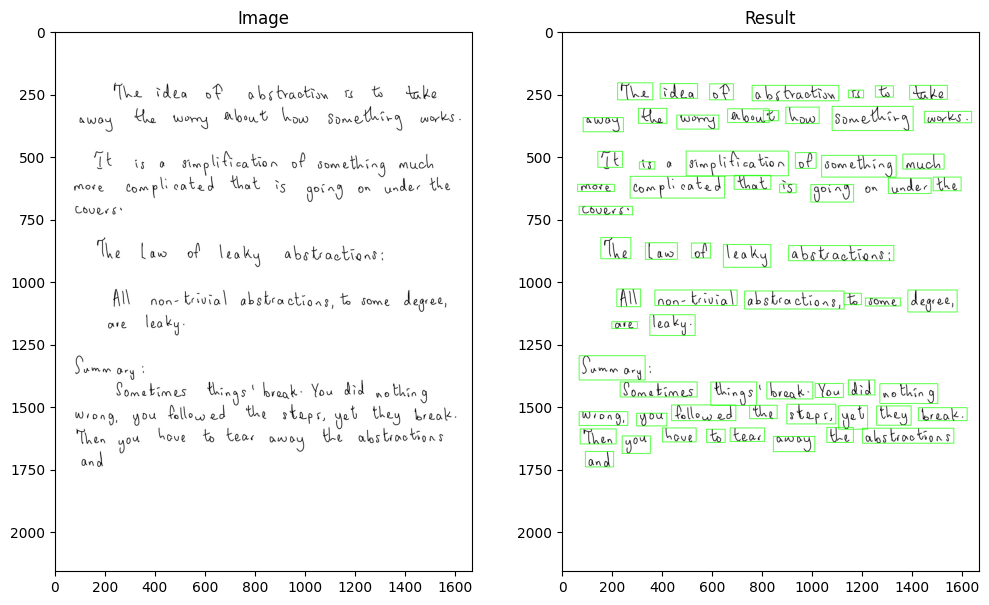

Num of words 66


In [3]:
# Example Splitting

pre_process_words("Abstractions-1.jpg", display=True)

In [4]:
def pre_process_characters(image_path, display=False, hd=False, verbose=False):
    '''
    Function to break down the image to individual words

    Input: image_path - path to the image
            display - flag to display

    Output: None
    '''
    # Load the image
    base_file_path = "./hw_images/"
    img = cv2.imread(base_file_path + image_path)
    image = img.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    otsu1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)[1]

    # Dilate the image: Using a morph ellipse here instead of rectangle to capture more of the nuances of a character. 
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 10))
    dilation = cv2.dilate(otsu1, kernel, iterations=1)
    contours, _ = cv2.findContours(dilation, 
                                        cv2.RETR_EXTERNAL, 
                                        cv2.CHAIN_APPROX_NONE)

    # Find the contours
    img_list = []
    count = 0

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w > 15 and h > 25:
            count += 1
            if hd:
                img_list.append(cv2.resize(otsu1[y:y+h, x:x+w], (1024, 1024)))
            else:
                img_list.append(cv2.resize(otsu1[y:y+h, x:x+w], (256, 256)))
            rect = cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)

    if display:
        # Display images
        ax = plt.subplots(1,2, figsize=(12,7))[1]

        # Original image
        ax[0].imshow(img)
        ax[0].set_title('Image')

        # Pre-processed image
        ax[1].imshow(image)
        ax[1].set_title('Result')
        plt.show()

    num_chars = len(img_list)
    print('Num of characters', num_chars)
    
    for i, box in enumerate(img_list):
        if hd:
            filename = base_file_path + 'characters_hd/' + image_path.split('.')[0] + '_' + str(i) + '.png'
        
        else:
            filename = base_file_path + 'characters/' + image_path.split('.')[0] + '_' + str(i) + '.png'

        if os.path.exists(filename):
            if verbose == True:
                print('Skipped', filename)
            continue
        
        cv2.imwrite(filename, box)

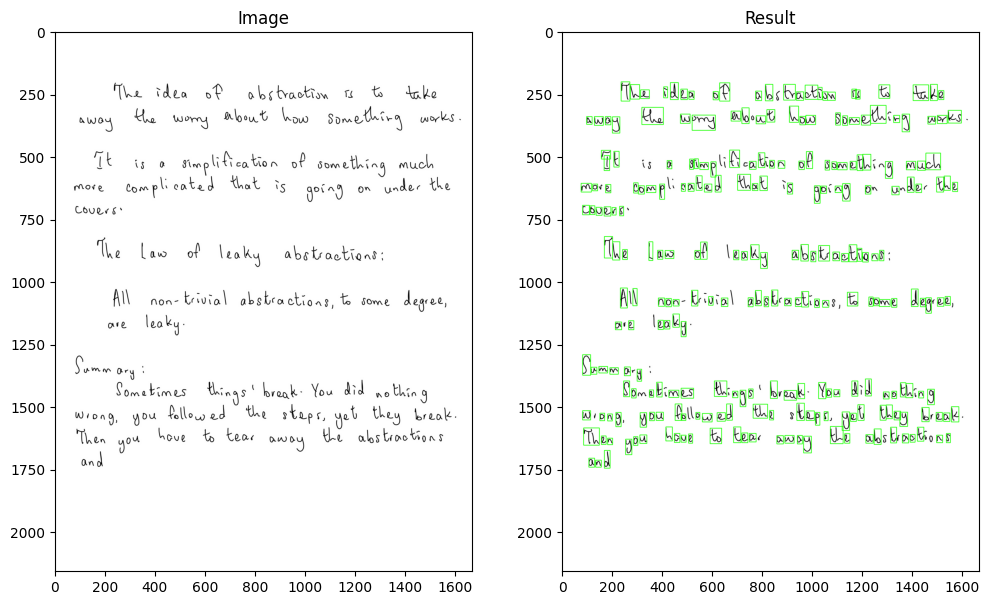

Num of characters 252


In [5]:
# Characters Separation

pre_process_characters('Abstractions-1.jpg', display=True)